> ### EEE4423: Deep Learning Lab

# LAB \#3: CNN: VGG Net and ResNet

<h4><div style="text-align: right"> Due date: March 24, 2023.  </div> <br>
<div style="text-align: right"> Please upload your file @ LearnUs until the start of class in the form of [ID_Name_Lab03.ipynb]. </div></h4>

### *Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically.**</span> 
- Each team must write their own answers and codes (<span style="color:red">**if not you will get a F grade**</span>).

<h2><span style="color:blue">[2018142102] [Euijin Hong]</span> </h2>

#Discussion

1. **VGGNet**

> - 현재 구현된 VGGNet에서는 총 13개의 conv. layer와 3개의 fc layer를 통해 model이 구성된다. 
- 논문에서 볼 수 있었던 것처럼, 크기가 작은 conv. layer 여러 개를 연결함으로써 넓은 effective receptive field를 얻을 수 있었고, 더욱 깊은 layer와 feature map을 가질 수 있었다. 
- 총 20번의 학습 epoch마다 성능 평가를 했을 때, Cross Entropy Loss를 통해 얻은 최소 loss는 0.00041532100294716656, 최대 accuracy는 93.0%로 나타났다.
- 전체 parameter의 수는 33617987개로, ResNet50의 23506499개와 비교했을 때 더 많은 수를 보인다. 그러나 epoch당 소요 시간은 VGGNet이 더 짧았는데, 이는 VGGNet의 layer 깊이가 더 얕고 parameter의 개수가 마지막 3개의 FC layer에 편중되어 있었기 때문에 back propagation에 걸리는 시간이 더 짧았을 것이라고 해석할 수 있다. 
- 상대적으로 얕은 layer깊이에도 accuracy가 크게 나온 이유는, Input image의 size가 32x32였기 때문에 각 이미지 당 feature의 개수가 적었고, 따라서 layer의 수가 적은 VGGNet이 가지는 effective receptive field로도 사진에서 충분한 양의 feature를 뽑아낼 수 있었기 때문에, 좋은 성능을 이끌어낼 수 있었다. 
- 논문에서는 구현되어 있지 않은 Batch Normalization을 각각의 convolutional layer의 output에 적용시켰기 때문에 gradient의 분포를 정규화할 수 있었을 것이고, 이것이 좋은 성능으로 이어진 요인 중 하나이다. 
- Channel의 개수는 현재 데이터셋으로 학습하는 데 있어서 크게 유의미하지 않았다. VGGNet은 최대 channel 개수가 512개, ResNet은 최대 2048개였으나, 결과적으로는 VGGNet의 성능이 더 좋았다. 이는 앞서 언급했던 image당 feature개수가 많지 않았기 때문이다. 
- Epoch를 거듭하면서 성능(accuracy)이 향상되는 속도는 VGGNet(20epoch동안 9.84% 향상)이 ResNet(15epoch동안 12.7% 향상)보다는 느렸다. 이는 VGGNet의 accuracy가 더 빨리 saturated 되었기 때문이라고 판단된다. 실제로 epoch 6 이후의 epoch들의 accuracy에서는 VGGNet의 성능 향상이 더디게 일어나는 것을 볼 수 있다. 이는 layer깊이가 saturation 속도에 영향을 미쳤기 때문이라고 볼 수 있다(깊이가 얕을수록 saturation이 더 빨리 일어난다). 
- 그렇지만, 첫 epoch에서 학습한 weight을 가지고 test set을 대상으로 얻은 accuracy는 VGGNet(83.16%)이 ResNet(72.7%)보다 높았다. 이 역시 VGGNet의 layer 깊이가 얕기 때문에 초기 training을 통해 weight들이 더 빨리 optimize 되었을 것이다. 


2. **ResNet**

> - 현재 구현된 ResNet에서는 총 49개의 conv. layer와 1개의 FC layer로 모델이 구성된다. 
- 논문에서 볼 수 있었던 것처럼, residual learning을 통해 새로운 conv. layer들을 연결해도 gradient vanishing(미분되어 0으로 수렴) / exploding(미분을 거듭할수록 발산) 문제가 일어나지 않았고, degradation problem 역시 발생하지 않음을 확인할 수 있었다. 이를 통해 50개의 layer를 연결하여 training을 거듭할수록 성능이 향상되며 양호한 test accuracy를 내는 모델을 얻을 수 있었다. 
- 총 15번의 epoch마다 학습한 결과, Cross Entropy Loss로 구한 loss의 최소값은 0.009811549447476864, 최대 accuracy는 85.40%로 나타났다. 
- 전체 parameter의 수는 23506499개로, VGGNet의 33617987개와 비교했을 때 더 적은 수를 보인다. 그러나 epoch당 소요 시간은 VGGNet보다 더 길었는데, 이는 ResNet의 계층 깊이가 더 깊고, 따라서 backpropagation에 소요되는 시간 자체가 더 많이 소요되었기 때문이다. 
- 상대적으로 깊은 layer 깊이를 가짐에도 불구하고 성능이 좋게 나오지 못한 이유는, 각각의 layer들의 parameter들이 학습되는 데 epoch의 수가 충분하지 않았기 때문으로 볼 수 있다. Layer의 깊이가 더 깊기 때문에 weight들이 optimize 되는 데에는 더 많은 iteration이 필요하다. 
- 이렇게 생각할 수 있는 근거 중 하나로, 매 epoch를 거듭하면서 학습한 결과 15번째 epoch까지도 saturation이 일어나지 않았다는 것을 들 수 있다. Epoch 당 accuracy를 보면 72.7%부터 85.4%까지 꾸준히 성능이 향상되고 있음을 보인다. 이는 ResNet의 layer개수가 많고 깊이가 깊기 때문에 weight update가 더욱 작고 천천히 나타나기 때문이다. 따라서, 현재 얻은 accuracy는 unoptimized weight에 의한 것일 확률이 높고, 더 많은 epoch를 거쳐 training을 한다면 계속 optimize되어 saturation에 다다를 것이다. 
- 처음 epoch에서 학습한 weight을 가지고 accuracy를 측정했을 때 값이 상대적으로 작았는데(72.7% vs 83.16%), 이는 epoch마다 train iteration에서 일어나는 back propagation을 통해 weight들이 최적화되는 속도가 느리고 update되는 폭이 작기 때문이다. 
- 성능이 좋지 못한 또 하나의 이유는, ResNet을 통해 계층 깊이를 깊게 함으로써 얻을 수 있는 '더 넓은 receptive field를 두고, 더욱 다양한 feature를 학습할 수 있다'는 이점이 현재 사용한 32x32 데이터셋에는 적용될 수 없었기 때문이다. 애초에 32x32 이미지에서 feature 개수는 많지 않기 때문이다. 더 복잡한 분류 문제에서나 사이즈가 더 큰 이미지에서는 ResNet이 상대적으로 더 좋은 성능을 보였을 것이라 예상한다. 


In [ ]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2023-03-22 09:41:51.226577


## 1. VGGNet with PyTorch

### Implementing VGGNet

> 1. **Dataset**
>> - Images from the first three categories in CIFAR-10. (Due to the computational constraints.)  <br>
     Three categories : plane, car, bird  /  The number of training images : 15,000   /  The number of test images : 3,000
>> - Augmented with flipping and random cropping.
>
> 2. **Network architecture**
>> - Type-D configuration in the paper (+ 3-way classifier after convolutional layers).
>> - ReLU activation.
>> - No dropout for simplicity.
>> - We will apply **batch-normalization** after every convolution which is not used in the paper (otherwise, hard to optimize).
>>
>> <table><tr>
>> <td> <img src="http://drive.google.com/uc?export=view&id=1jn7ICUJAcTF3WQ1XuUffOdmprgj4u1c3" alt="no_image" style="width: 550px;"/> </td>
>> <td> <img src="http://drive.google.com/uc?export=view&id=1Rz0iWW6VoLD_XGdRa3ofYyhCTTb6kR_k" alt="no_image" style="width: 250px;"/> </td>
>> </tr></table>
>>
>> <font size="0.5"> Figure from <br>
>> [1] https://www.quora.com/What-is-the-VGG-neural-network </font>
>
> 3. **Loss function**
>> - Cross-entropy loss between outputs & ground-truths. <br>
     Note that `nn.CrossEntroyLoss` takes logits before softmax as network outputs and scalar index (not one-hot vector) as ground-truths.<br>
     See https://pytorch.org/docs/stable/nn.html#crossentropyloss for details.
>
> 4. **Training**
>> - Default weight initialization for simplicity.
>> - SGD optimizer with `learning rate = 1e-2`, `momentum = 0.9`, and `weight_decay = 5e-4`.
>> - 20 epochs without learning rate scheduling.
>
> 5. **Evaluation metric**
>> - Classification accuracy (i.e., the percentage of correct predictions).
>
> 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dsets 
import torchvision
import time
import os

# os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
print('STEP 1: LOADING DATASET')

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_dataset = dsets.CIFAR10(root='../dataset/lab03', 
                            train=True, 
                            transform=transform_train,
                            download=True)

test_dataset = dsets.CIFAR10(root='../dataset/lab03', 
                           train=False, 
                           transform=transform_test)

STEP 1: LOADING DATASET


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../dataset/lab03/cifar-10-python.tar.gz to ../dataset/lab03


In [ ]:
# reducing the dataset
reduced_train_dataset = []
for images, labels in train_dataset:
    if labels < 3:
        reduced_train_dataset.append((images, labels))
        
reduced_test_dataset = []
for images, labels in test_dataset:
    if labels < 3:
        reduced_test_dataset.append((images, labels))

In [ ]:
print(reduced_test_dataset[0][0][0].shape)

torch.Size([32, 32])


In [ ]:
print("The number of training images : ", len(reduced_train_dataset))
print("The number of test images : ", len(reduced_test_dataset))

The number of training images :  15000
The number of test images :  3000


In [ ]:
print('STEP 2: MAKING DATASET ITERABLE')

train_loader = torch.utils.data.DataLoader(dataset=reduced_train_dataset, 
                                           batch_size=128, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=reduced_test_dataset, 
                                          batch_size=100, 
                                          shuffle=False)

class_names = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

STEP 2: MAKING DATASET ITERABLE


### Visualize a few images

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.4914, 0.4822, 0.4465])
    std = np.array([0.2023, 0.1994, 0.2010])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

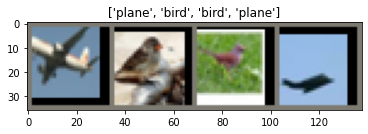

In [ ]:
train_loader_sample = torch.utils.data.DataLoader(dataset=reduced_train_dataset, 
                                           batch_size=4, 
                                           shuffle=True)

# Get a batch of training data
inputs, classes = next(iter(train_loader_sample))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

### 1.1 Write code (VGG 16) [3 points]

In [ ]:
print('STEP 3: CREATE MODEL CLASS (VGG16)')

#############
# CODE HERE #
#############

# basic configuration of convolutional layer(conv - BN - relu)
class convBNrelu(nn.Module):
  def __init__(self, in_ch, out_ch):
    super(convBNrelu, self).__init__()
    # using conv. layer that has kernel size of 3x3
    self.conv = nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1, stride=1)
    self.bn = nn.BatchNorm2d(out_ch)
    self.relu = nn.ReLU()

  # define forward propagation
  def forward(self, x):
    x = self.conv(x)
    x = self.bn(x)
    x = self.relu(x)
    return x

# VGG16 model by concatenating each conv. layer
class VGG(nn.Module):
  def __init__(self):
    super(VGG, self).__init__()
    self.conv1 = convBNrelu(3, 64)
    self.conv2 = convBNrelu(64, 64)
    self.conv3 = convBNrelu(64, 128)
    self.conv4 = convBNrelu(128, 128)
    self.conv5 = convBNrelu(128, 256)
    self.conv6 = convBNrelu(256, 256)
    self.conv7 = convBNrelu(256, 256)
    self.conv8 = convBNrelu(256, 512)
    self.conv9 = convBNrelu(512, 512)
    self.conv10 = convBNrelu(512, 512)
    self.conv11 = convBNrelu(512, 512)
    self.conv12 = convBNrelu(512, 512)
    self.conv13 = convBNrelu(512, 512)
    self.maxpool = nn.MaxPool2d(2, stride=2)
    self.relu = nn.ReLU()
    self.linear1 = nn.Linear(1*1*512, 4096)
    self.linear2 = nn.Linear(4096, 4096)
    self.linear3 = nn.Linear(4096, 3)
    # self.softmax = nn.Softmax()

  # define forward propagation
  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.maxpool(x)

    x = self.conv3(x)
    x = self.conv4(x)
    x = self.maxpool(x)

    x = self.conv5(x)
    x = self.conv6(x)
    x = self.conv7(x)
    x = self.maxpool(x)

    x = self.conv8(x)
    x = self.conv9(x)
    x = self.conv10(x)
    x = self.maxpool(x)

    x = self.conv11(x)
    x = self.conv12(x)
    x = self.conv13(x)
    x = self.maxpool(x)

    # resize in order to match the input shape of FC layer
    x = x.view(x.size(0), -1)

    x = self.linear1(x)
    x = self.relu(x)

    x = self.linear2(x)
    x = self.relu(x)

    x = self.linear3(x)

    return x

STEP 3: CREATE MODEL CLASS (VGG16)


In [ ]:
print('STEP 4: INSTANTIATE MODEL CLASS')


model = VGG()
num_total_params = sum(p.numel() for p in model.parameters())
print("The number of parameters : ", num_total_params)
#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

STEP 4: INSTANTIATE MODEL CLASS
The number of parameters :  33617987


VGG(
  (conv1): convBNrelu(
    (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2): convBNrelu(
    (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv3): convBNrelu(
    (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv4): convBNrelu(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv5): convBNrelu(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1

In [ ]:
print('STEP 5: INSTANTIATE LOSS CLASS')

criterion = nn.CrossEntropyLoss()

print('STEP 6: INSTANTIATE OPTIMIZER CLASS')

learning_rate = 1e-2
momentum = 0.9
weight_decay = 5e-4

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = momentum, weight_decay = weight_decay)

STEP 5: INSTANTIATE LOSS CLASS
STEP 6: INSTANTIATE OPTIMIZER CLASS


### 1.2 Train the VGG 16 model and print test accuracy for every epochs [2 points]

In [ ]:
import time

print('STEP 7: TRAIN THE MODEL')
num_epochs = 20

#############
# CODE HERE #
#############

iter = 0
for epochs in range(num_epochs):
  start_time = time.time()
  correct = 0
  total = 0
  for i, (images, labels) in enumerate(train_loader):
    # use GPU for images, labels
    x = images.to(device)
    y = labels.to(device)
    # clear gradients with respect to parameters
    optimizer.zero_grad()
    # forward propagation of model
    outputs = model(x)
    # evaluating loss by CELoss function
    loss = criterion(outputs, y)
    # get gradients with respect to parameters
    loss.backward()
    # update parameters
    optimizer.step()
    iter += 1
  for images, labels in test_loader:
    # use GPU for images, labels
    x = images.to(device)
    y = labels.to(device)
    # forward propagation of model
    outputs = model(x)
    # get prediction 
    _, predicted = torch.max(outputs.data, 1)
    # Total number of labels
    total += y.size(0)

  # calculating the test accuracy for every epoch
    if torch.cuda.is_available():
      correct += (predicted.cpu() == y.cpu()).sum()
    else:
      correct += (predicted == y).sum()
  acc = correct.item() / total * 100
  
  end_time = time.time()
  print(f'Epochs: {epochs}. Loss: {loss.item()}. Accuracy: {acc}%. Elapsed time: {end_time - start_time} sec')

STEP 7: TRAIN THE MODEL
Epochs: 0. Loss: 0.29931196570396423. Accuracy: 83.16666666666667%. Elapsed time: 14.683469295501709 sec
Epochs: 1. Loss: 0.21983899176120758. Accuracy: 87.43333333333332%. Elapsed time: 7.92712664604187 sec
Epochs: 2. Loss: 0.41874396800994873. Accuracy: 89.53333333333333%. Elapsed time: 7.972936630249023 sec
Epochs: 3. Loss: 0.08389822393655777. Accuracy: 89.06666666666668%. Elapsed time: 8.016444683074951 sec
Epochs: 4. Loss: 0.14379319548606873. Accuracy: 90.76666666666667%. Elapsed time: 8.057169675827026 sec
Epochs: 5. Loss: 0.37026992440223694. Accuracy: 88.43333333333334%. Elapsed time: 8.131429195404053 sec
Epochs: 6. Loss: 0.12070580571889877. Accuracy: 91.06666666666666%. Elapsed time: 8.11867356300354 sec
Epochs: 7. Loss: 0.04987487196922302. Accuracy: 90.9%. Elapsed time: 8.153318166732788 sec
Epochs: 8. Loss: 0.3299599587917328. Accuracy: 90.7%. Elapsed time: 8.178426027297974 sec
Epochs: 9. Loss: 0.2803879678249359. Accuracy: 91.36666666666666%. E

## 2. ResNet with PyTorch

### Implementing ResNet

> 1. **Dataset**
>> - The same dataset used for VGGNet
>
> 2. **Network architecture**
>> - 50-layer ResNet with **bottleneck blocks**. <br>
     Note. The initial convolution layer (i.e., conv1) is different from the one in the paper &<br>
     the initial max-pooling layer is removed (because the size of CIFAR-10 images is too small).
>> - ReLU activation.
>> - Strided convolution for down-sampling instead of max-pooling layer. <br>
     Note. Once down-sampled, a $1\times1$ convolution/stride 2 is applied to residual for expanding the channel of the residual.
>> - No dropout for simplicity.
>> - Batch-normalization after every convolution.
>>
>>
>> <table><tr>
>> <td> <img src="http://drive.google.com/uc?export=view&id=1l3rC40WnBXZBagFIuME48SPvcqVY-56Y" alt="no_image" style="width: 500px;"/> </td>
>> <td> <img src="http://drive.google.com/uc?export=view&id=1r92UcNqn6ZT5pOk3emEijjTKlWdAYvCk" alt="no_image" style="width: 300px;"/> </td>
>> </tr></table>
>>
>> <img src="http://drive.google.com/uc?export=view&id=1n0NYyWWbDBd9PHjNEs7AHpOhMci5q6qk" alt="no_image" style="width: 870px;"/>
>>
>> <font size="0.5"> Figures from <br> 
>> [1] https://www.codeproject.com/Articles/1248963/Deep-Learning-using-Python-plus-Keras-Chapter-Re  <br> 
>> [2] Rezende et al., *Signal Processing: Image Communication*, 2018. </font>
>
> 3. **Loss function**
>> - Cross-entropy loss between outputs & ground-truths. <br>
>
> 4. **Training**
>> - Default weight initialization for simplicity.
>> - SGD optimizer with `learning rate = 1e-2`, `momentum = 0.9`, and `weight_decay = 5e-4`.
>> - 15 epochs without learning rate scheduling.
>
> 5. **Evaluation metric**
>> - Classification accuracy (i.e., the percentage of correct predictions).
>
> 

### 2.1 Implement ResNet50 and train it with the CIFAR 10 dataset [4 points] 

In [ ]:
print('STEP 3: CREATE MODEL CLASS (ResNet-50)')
#############
# CODE HERE #
#############

# implement the single bottleneck block
class BottleneckBlock(nn.Module):
  exp = 4 # expansion by 4
  def __init__(self, in_ch, out_ch, stride=1):  
    super(BottleneckBlock, self).__init__()
    self.residual = nn.Sequential(
        nn.Conv2d(in_ch, out_ch, kernel_size=1, stride=stride, bias=False),  # stride of the first conv. layer: e.g.) stride = 2 when down-sampled
        nn.BatchNorm2d(out_ch),
        nn.ReLU(),
        nn.Conv2d(out_ch, out_ch, kernel_size=3, stride=1, padding=1, bias=False),
        nn.BatchNorm2d(out_ch),
        nn.ReLU(),
        nn.Conv2d(out_ch, out_ch * BottleneckBlock.exp, kernel_size=1, stride=1, bias=False),
        nn.BatchNorm2d(out_ch * BottleneckBlock.exp)
    )
    self.shortcut = nn.Sequential()
    self.relu = nn.ReLU()

    # 1x1 convolution for resizing in case of residual connection with channel expanding
    if stride != 1 or in_ch != out_ch * BottleneckBlock.exp:
      self.shortcut = nn.Sequential(
          nn.Conv2d(in_ch, out_ch * BottleneckBlock.exp, kernel_size=1, stride=stride, bias=False),
          nn.BatchNorm2d(out_ch * BottleneckBlock.exp)
      )

  # define forward propagation by adding the conv block and the residual shortcut 
  def forward(self, x):
    x = self.residual(x) + self.shortcut(x)
    x = self.relu(x)
    return x

# configuration of ResNet50 by concatenating bottleneck blocks
class ResNet50(nn.Module):
  def __init__(self, blocks):
    super(ResNet50, self).__init__()
    self.in_ch = 64
    self.conv1 = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False), 
        nn.BatchNorm2d(64),
        nn.ReLU()
    )
    self.conv2_x = self._make_layer(64, blocks[0], 1)
    self.conv3_x = self._make_layer(128, blocks[1], 2)
    self.conv4_x = self._make_layer(256, blocks[2], 2)
    self.conv5_x = self._make_layer(512, blocks[3], 2)
    self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
    self.linear = nn.Linear(512*BottleneckBlock.exp, 3)
  
  # generating each of the layer sets
  def _make_layer(self, out_ch, block_num, stride):
    strides = [stride] + ([1] * (block_num - 1))  # if down-sampled, stride of initial 1x1 conv. layer = 2, else stride = 1
    layers = []
    for stride in strides:
      layers.append(BottleneckBlock(self.in_ch, out_ch, stride))
      self.in_ch = out_ch * BottleneckBlock.exp  # update size of input channel to 4f
    return nn.Sequential(*layers)  # concatenating the bottleneck layers 

  # define forward propagation
  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2_x(x)
    x = self.conv3_x(x)
    x = self.conv4_x(x)
    x = self.conv5_x(x)
    x = self.avgpool(x)
    x = x.view(x.size(0), -1)
    x = self.linear(x)
    return x

print('STEP 4: INSTANTIATE MODEL CLASS')
#############
# CODE HERE #
#############

# instantiate model
model = ResNet50([3, 4, 6, 3])
# view model info
num_total_params = sum(p.numel() for p in model.parameters())
print("The number of parameters : ", num_total_params)

#######################
#  USE GPU FOR MODEL  #
#######################

# model to gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

STEP 3: CREATE MODEL CLASS (ResNet-50)
STEP 4: INSTANTIATE MODEL CLASS
The number of parameters :  23506499


ResNet50(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv2_x): Sequential(
    (0): BottleneckBlock(
      (residual): Sequential(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
        (6): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): Ba

### 2.2 Print test accuracy for every epochs. [1 points]

In [ ]:
print('STEP 5: INSTANTIATE LOSS CLASS')
#############
# CODE HERE #
#############

# Cross-entropy loss between outputs & ground-truths.
criterion = nn.CrossEntropyLoss()

print('STEP 6: INSTANTIATE OPTIMIZER CLASS')
#############
# CODE HERE #
#############

learning_rate = 1e-2
momentum = 0.9
weight_decay = 5e-4

# SGD optimizer with learning rate = 1e-2, momentum = 0.9, and weight_decay = 5e-4.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = momentum, weight_decay = weight_decay)

print('STEP 7: TRAIN THE MODEL')

#############
# CODE HERE #
#############
import time

num_epochs = 15
iter = 0
for epochs in range(num_epochs):
  start_time = time.time()
  correct = 0
  total = 0
  for i, (images, labels) in enumerate(train_loader):
    # use GPU for images, labels
    x = images.to(device)
    y = labels.to(device)
    # clear gradients with respect to parameters
    optimizer.zero_grad()
    # Forward propagation of model
    outputs = model(x)
    # Evaluating loss by CELoss function
    loss = criterion(outputs, y)
    # get gradients with respect to parameters
    loss.backward()
    # update parameters
    optimizer.step()
    iter += 1
  for images, labels in test_loader:
    # use GPU for images, labels
    x = images.to(device)
    y = labels.to(device)
    # Forward propagation of model
    outputs = model(x)
    # get prediction 
    _, predicted = torch.max(outputs.data, 1)
    # Total number of labels
    total += y.size(0)

  # calculate the test accuracy for every epoch
    if torch.cuda.is_available():
      correct += (predicted.cpu() == y.cpu()).sum()
    else:
      correct += (predicted == y).sum()
  acc = correct.item() / total * 100
  
  end_time = time.time()
  print(f'Epochs: {epochs}. Loss: {loss.item()}. Accuracy: {acc}%. Elapsed time: {end_time - start_time} sec')

STEP 5: INSTANTIATE LOSS CLASS
STEP 6: INSTANTIATE OPTIMIZER CLASS
STEP 7: TRAIN THE MODEL
Epochs: 0. Loss: 0.6427963376045227. Accuracy: 72.7%. Elapsed time: 43.467217683792114 sec
Epochs: 1. Loss: 0.7724347114562988. Accuracy: 75.66666666666667%. Elapsed time: 44.06955647468567 sec
Epochs: 2. Loss: 0.40925082564353943. Accuracy: 80.9%. Elapsed time: 43.99801778793335 sec
Epochs: 3. Loss: 0.45517969131469727. Accuracy: 79.4%. Elapsed time: 44.2958447933197 sec
Epochs: 4. Loss: 0.827409565448761. Accuracy: 82.13333333333334%. Elapsed time: 44.30492901802063 sec
Epochs: 5. Loss: 0.11804942041635513. Accuracy: 82.5%. Elapsed time: 44.23716163635254 sec
Epochs: 6. Loss: 0.4073950946331024. Accuracy: 83.86666666666667%. Elapsed time: 44.16420269012451 sec
Epochs: 7. Loss: 0.044458404183387756. Accuracy: 83.7%. Elapsed time: 44.14481735229492 sec
Epochs: 8. Loss: 0.06275071948766708. Accuracy: 83.86666666666667%. Elapsed time: 44.14321231842041 sec
Epochs: 9. Loss: 0.21250970661640167. Accu